In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

path=r'C:/Users/LCP/Desktop/统计学习实现/练习/data/Water/water_potability.csv'
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

In [41]:
#加载数据
def load_data():
    DF=pd.read_csv(path)
    return DF

DF=load_data()

#划分训练集与测试集
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(DF,test_size=0.2)

#填充缺失值
modes=train_df.mode().iloc[0]
train_df.fillna(modes,inplace=True)
test_df.fillna(modes,inplace=True)
fea_list=train_df.columns.tolist()

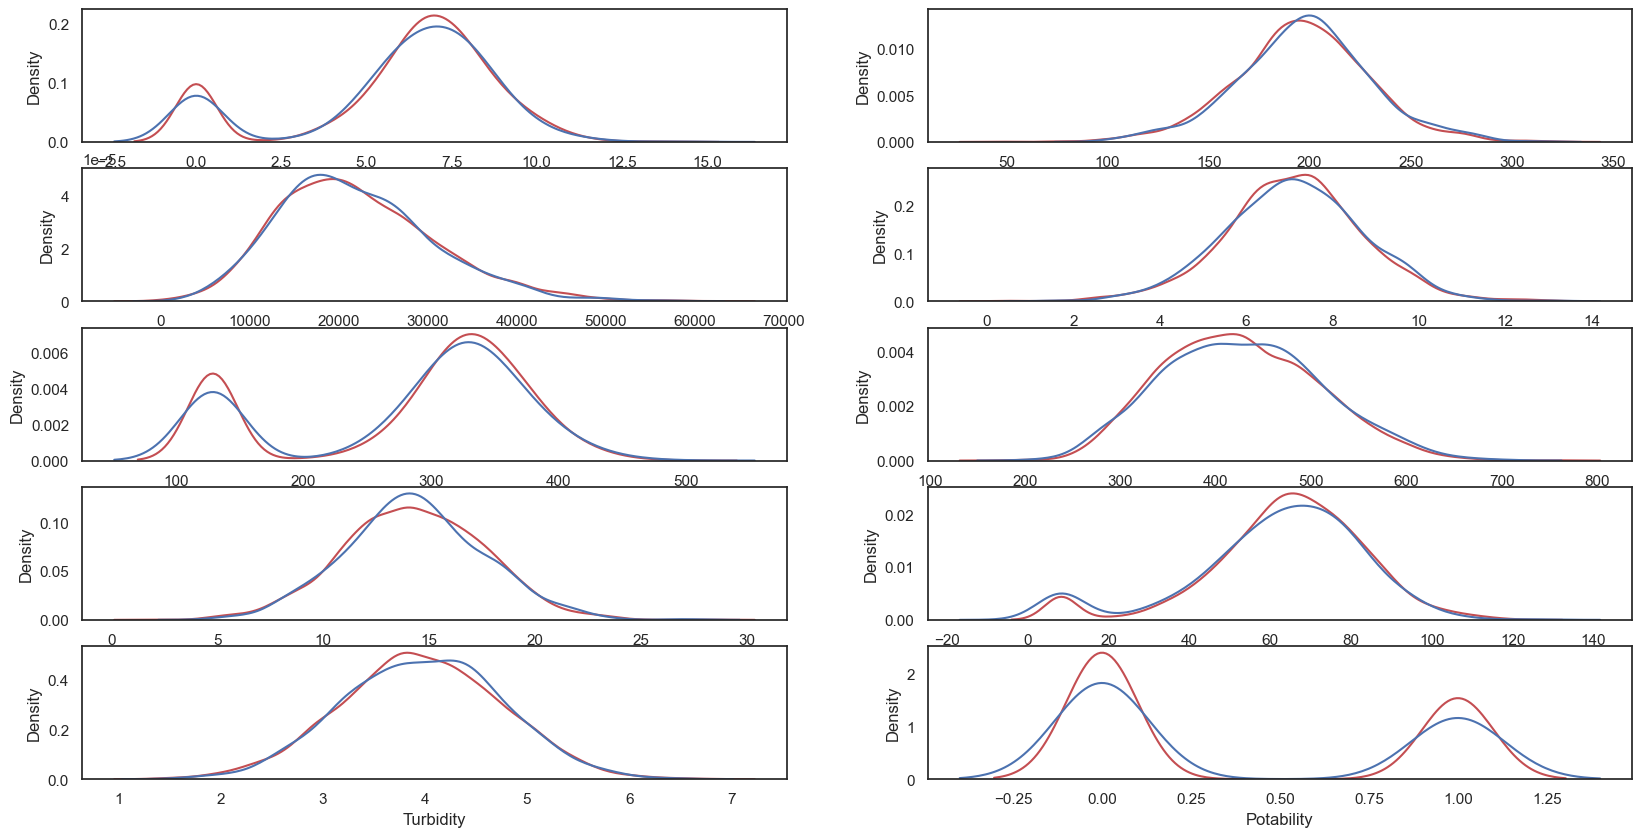

In [42]:
#查看特征分布情况
fig=plt.figure(figsize=(20,10))
i=1
for item in fea_list:
    ax=fig.add_subplot(5,2,i)
    sns.kdeplot(train_df[item],color='r',ax=ax)
    sns.kdeplot(test_df[item],color='b',ax=ax)
    i+=1
plt.show()

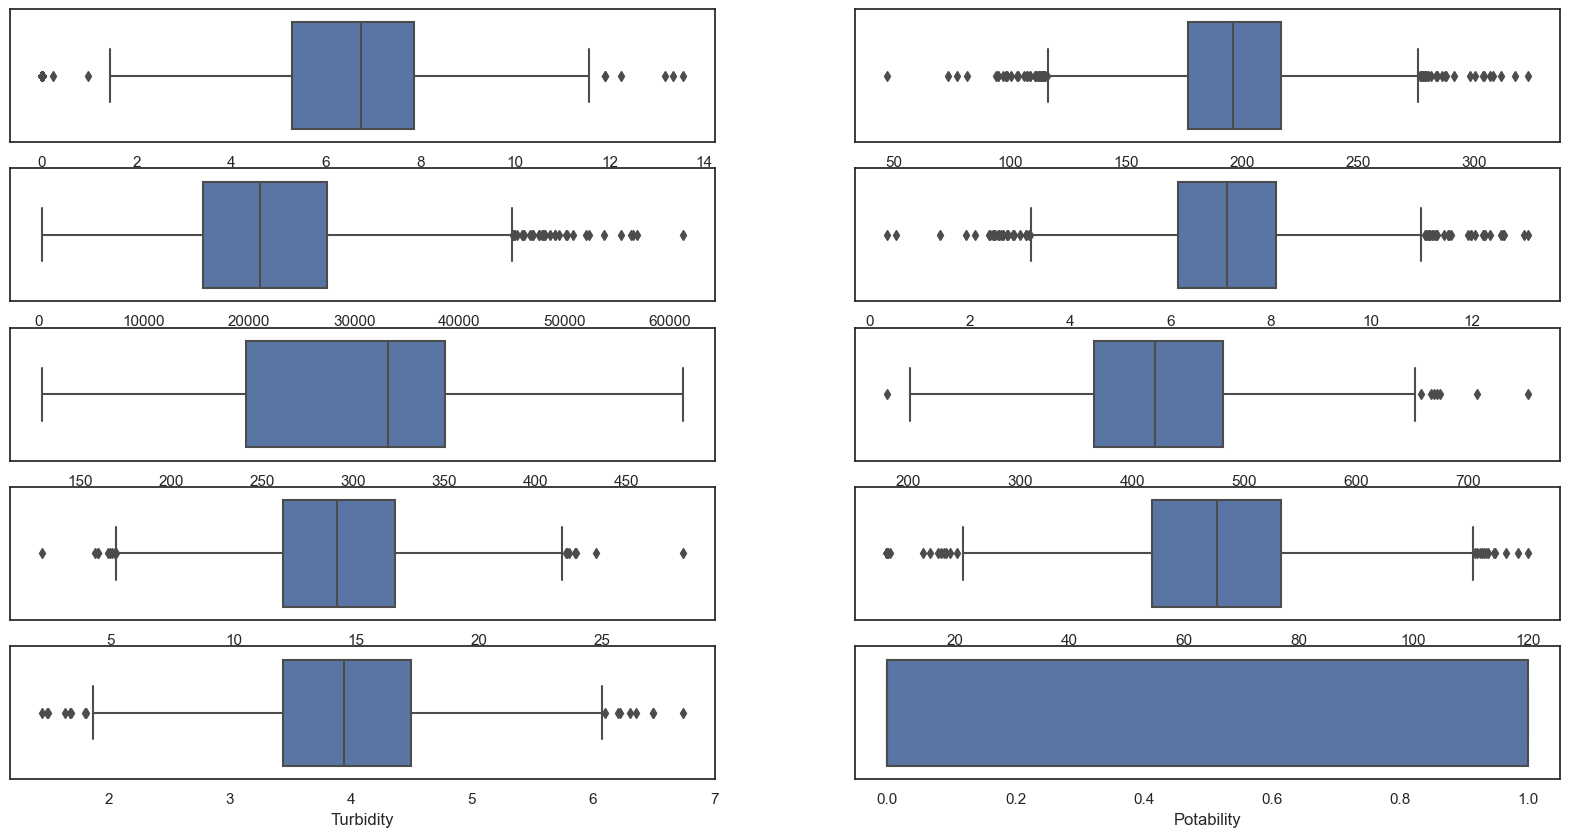

In [43]:
#箱线图查看特征的缺失值
fig=plt.figure(figsize=(20,10))
i=1
for item in fea_list:
    ax=fig.add_subplot(5,2,i)
    sns.boxplot(x=item,data=train_df,ax=ax)
    i+=1
plt.show()

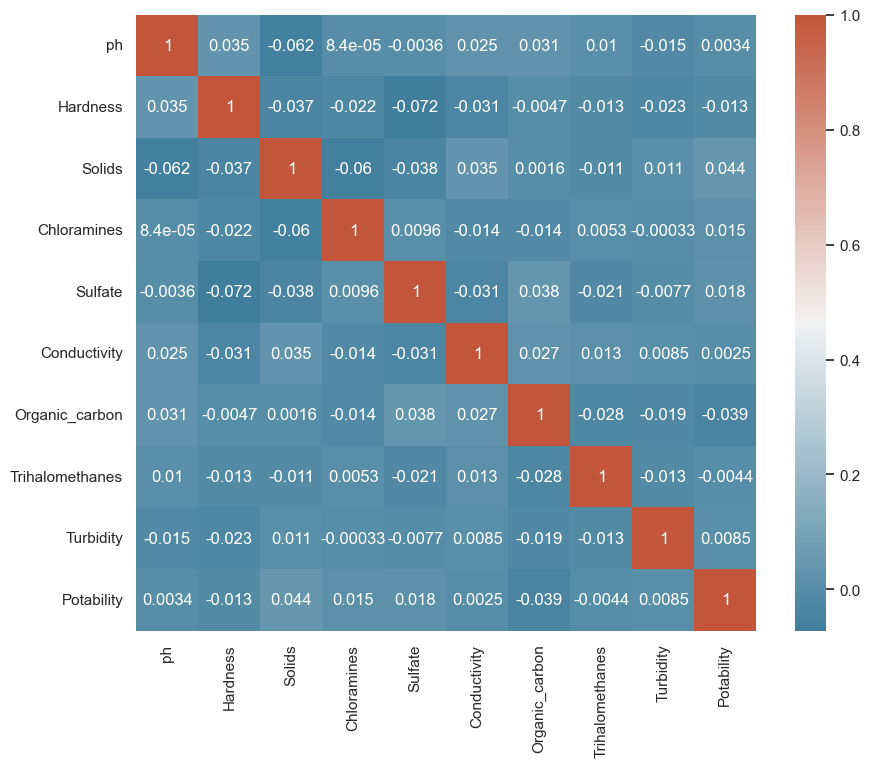

In [44]:
#查看特征与标签的相关性
cor=train_df.corr()
fig=plt.figure(figsize=(10,8))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor,cmap=cmap,annot=True)
plt.show()

In [45]:
#转化数据
train_label=np.array(train_df['Potability'])
train_x=np.array(train_df.drop(columns=['Potability']))
test_label=np.array(test_df['Potability'])
test_x=np.array(test_df.drop(columns=['Potability']))

#训练模型
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=75,max_depth=5)
xgb.fit(train_x,train_label)

from sklearn.metrics import accuracy_score
y_pred_test=xgb.predict(test_x)
accuracy_score(y_pred=y_pred_test,y_true=test_label)

0.6280487804878049

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

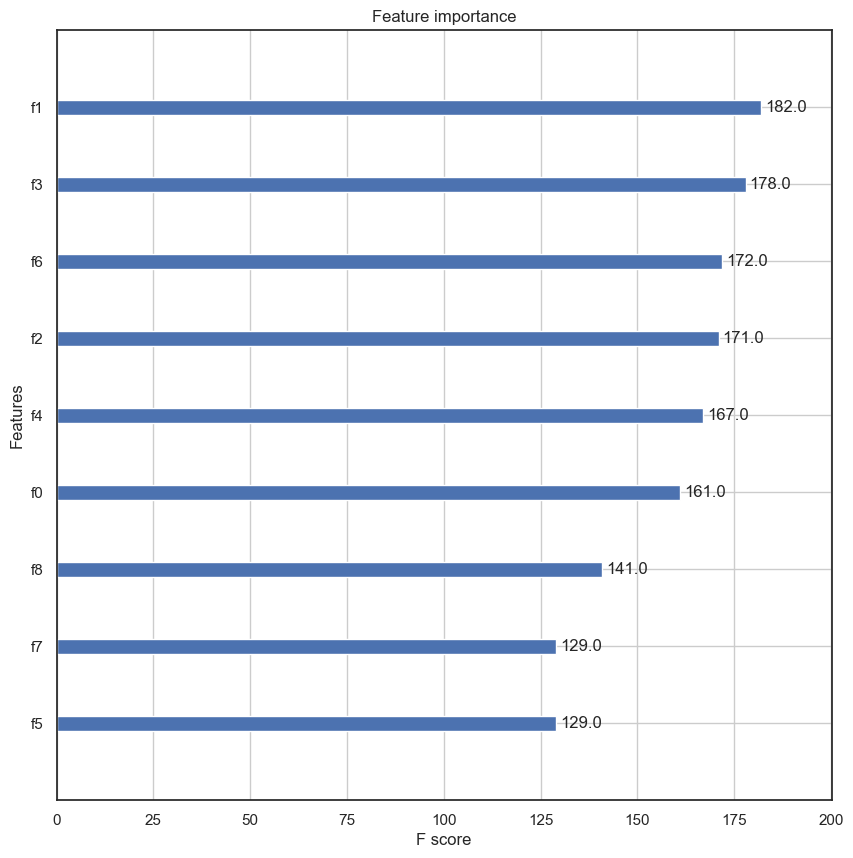

In [46]:
fig=plt.figure(figsize=(10,10))
from xgboost import plot_importance
ax=fig.add_subplot(1,1,1)
plot_importance(xgb,ax=ax)

In [55]:
drop_list=[fea_list[7],fea_list[8],fea_list[5],'Potability']
train_x=np.array(train_df.drop(columns=drop_list))
test_x=np.array(test_df.drop(columns=drop_list))

#训练模型
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=75,max_depth=5)
xgb.fit(train_x,train_label)

from sklearn.metrics import accuracy_score
y_pred_test=xgb.predict(test_x)
accuracy_score(y_pred=y_pred_test,y_true=test_label)

0.6417682926829268